## 最急降下法

### データ準備

In [157]:
import pandas as pd
df = pd.read_csv('data/sample_data.csv')

In [158]:
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


### データ可視化

<AxesSubplot:xlabel='space', ylabel='rent'>

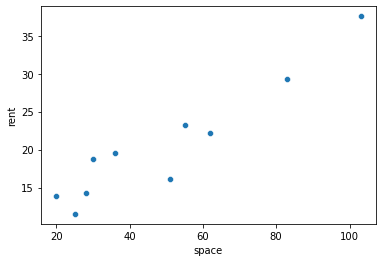

In [159]:
import seaborn as sns
sns.scatterplot(x='space', y='rent', data=df)

### 損失関数の定義

In [160]:
import numpy as np
x = df['space'].values
y = df['rent'].values

def cost_func(theta_0, theta_1, x, y):
    return np.mean(np.square(y - (theta_0 + theta_1*x)))

cost_func(5, 7, x=x, y=y)


138703.20244638805

### 損失関数の可視化

In [161]:
import matplotlib.pyplot as plt
from itertools import product
n0 = n1 = 300

min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
Z = [cost_func(param[0], param[1], x=x, y=y) for param in list(product(theta_0, theta_1))]
Z = np.array(Z).reshape(n0, n1)

In [162]:
np.array(list(product(theta_0, theta_1)))

array([[-20.        ,  -1.        ],
       [-20.        ,  -0.99331104],
       [-20.        ,  -0.98662207],
       ...,
       [ 20.        ,   0.98662207],
       [ 20.        ,   0.99331104],
       [ 20.        ,   1.        ]])

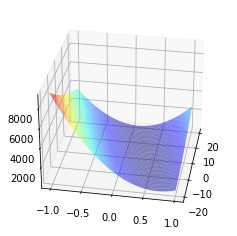

In [163]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z=Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

### 最急降下法

In [164]:
# theta_0, theta_1の初期値を設定
# np.random.seed(0)
# theta_0_init = np.random.uniform(min_0, max_0)
# theta_1_init = np.random.uniform(min_1, max_1)
theta_0_init = -5
theta_1_init = -0.5

In [165]:
# パラメータ更新の関数を定義
def update_theta0(theta_0, theta_1, x, y, alpha=0.05):
    return theta_0 - alpha * 2 * np.mean(theta_0 + theta_1*x -y)

def update_theta1(theta_0, theta_1, x, y, alpha=0.05):
    return theta_1 - alpha * 2 * np.mean( (theta_0 + theta_1*x -y)*x )

In [166]:
update_theta0(theta_0_init, theta_1_init, x=x, y=y, alpha=0.00005)

-4.994970259715448

In [167]:
update_theta1(theta_0_init, theta_1_init, x=x, y=y, alpha=0.00005)

-0.2003645901822223

In [168]:
# イテレーション数や学習率αを設定
epochs = 10**5
alpha = 0.00005

# イテレーションによりtheta_0とtheta_1を更新し, その履歴を保存
theta0_hist = [theta_0_init]
theta1_hist = [theta_1_init]
for _ in range(epochs):
    upd_theta_0 = update_theta0(theta0_hist[-1], theta1_hist[-1], x, y, alpha)
    upd_theta_1 = update_theta1(theta0_hist[-1], theta1_hist[-1], x, y, alpha)
    theta0_hist.append(upd_theta_0)
    theta1_hist.append(upd_theta_1)

In [169]:
print(theta0_hist[-1])
print(theta1_hist[-1])

5.692313583745944
0.2972194648547114


### 結果の描画

In [170]:
# それぞれのtheta0, theta1 における損失関数の推移を計算
params = zip(theta0_hist, theta1_hist)
cost_hist = [cost_func(*p, x=x, y=y) for p in params]

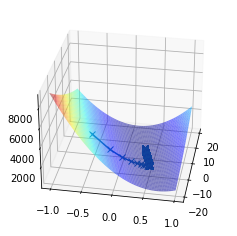

In [171]:
# theta0, theta1 の推移を損失関数に合わせて描画
ax = plt.axes(projection='3d')
ax.plot(theta0_hist, theta1_hist, cost_hist, 'x-')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

Text(0, 0.5, 'theta 0')

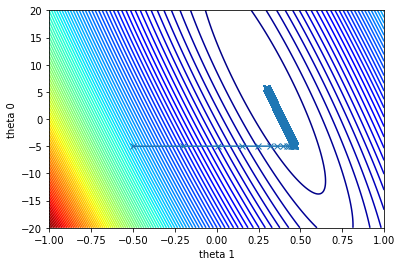

In [172]:
# theta0, theta1 の推移を等高線で描画
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta1_hist, theta0_hist, 'x-')
plt.xlabel('theta 1')
plt.ylabel('theta 0')

### 得られたtheta0とtheta1の解で回帰直線を描画

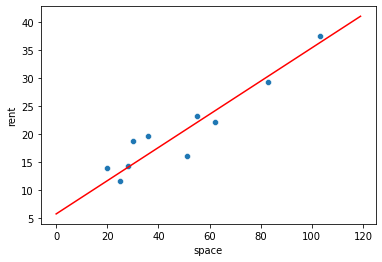

In [173]:
sns.scatterplot(x='space', y='rent', data=df)
x_values = np.arange(120)
y_values = theta0_hist[-1] + theta1_hist[-1]*x_values
plt.plot(x_values, y_values, '-', color='r')

In [174]:
space = 70
rent = theta0_hist[-1] + theta1_hist[-1]*space
rent

26.497676123575744